# Human Activity Recognition Using Classical Machine Learning

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In train data, we have 7352 datapoints and 564 columns(features)     
In test data, we have 2947 datapoints and 564 columns(features)

In [10]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [11]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [12]:
# Get x-train and y_train
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [21]:
x_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


/home/ankit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ankit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

/home/ankit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ankit/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [26]:
# get X_test and y_test from test csv file
x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

## Modelling

In [32]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [28]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Logistic Regression

In [23]:
# Grid Search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters,scoring = 'accuracy', cv=3)
log_reg_grid.fit(x_train,y_train)

print("tuned hyperparameters :(best parameters) ",log_reg_grid.best_params_)
print("accuracy :",log_reg_grid.best_score_)
print('best estimator: ',log_reg_grid.best_estimator_)

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.9362095715479174
best estimator:  LogisticRegression(C=1)


In [62]:
#LOGISTIC REGRESSION
model = LogisticRegression(C=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
lr_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print( 'Accuracy of Logistic Regression: ',lr_accuracy)

Accuracy of Logistic Regression:  0.9582626399728538


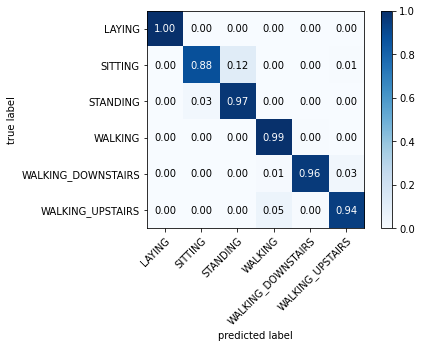

In [63]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=labels)
plt.show()

### Linear SVC

In [39]:
#Grid Search
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters,scoring = 'accuracy', cv=3)
lr_svc_grid.fit(x_train,y_train)

print("tuned hyperparameters :(best parameters) ",lr_svc_grid.best_params_)
print("accuracy :",lr_svc_grid.best_score_)
print('best estimator: ',lr_svc_grid.best_estimator_)

tuned hyperparameters :(best parameters)  {'C': 8}
accuracy : 0.946140101083273
best estimator:  LinearSVC(C=8, tol=5e-05)


In [103]:
#LINEAR SVC
model = LinearSVC(C=8, tol=5e-04)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
lsvc_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print( 'Accuracy of Linear SVC: ',lsvc_accuracy)

Accuracy of Linear SVC:  0.9670851713607058


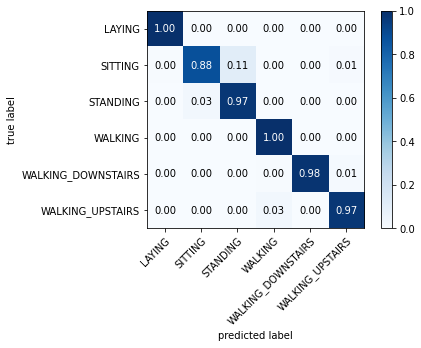

In [104]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=labels)
plt.show()

### Kernel SVM

In [42]:
#GridSearch
parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters,scoring = 'accuracy', cv=3)
rbf_svm_grid.fit(x_train,y_train)

print("tuned hyperparameters :(best parameters) ",rbf_svm_grid.best_params_)
print("accuracy :",rbf_svm_grid.best_score_)
print('best estimator: ',rbf_svm_grid.best_estimator_)

tuned hyperparameters :(best parameters)  {'C': 16, 'gamma': 0.0078125}
accuracy : 0.9440986186396224
best estimator:  SVC(C=16, gamma=0.0078125)


In [67]:
#KERNEL SVM
model = SVC(C=16, gamma=0.0078125)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
ksvm_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print( 'Accuracy of Kernel SVM: ',ksvm_accuracy)

Accuracy of Kernel SVM:  0.9626739056667798


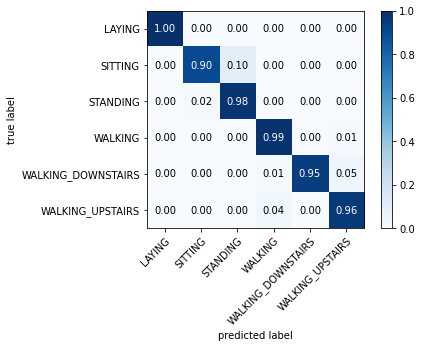

In [68]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=labels)
plt.show()

### Decision Tree

In [45]:
#GridSearch
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=parameters,scoring = 'accuracy', cv=3)
dt_grid.fit(x_train,y_train)

print("tuned hyperparameters :(best parameters) ",dt_grid.best_params_)
print("accuracy :",dt_grid.best_score_)
print('best estimator: ',dt_grid.best_estimator_)

tuned hyperparameters :(best parameters)  {'max_depth': 7}
accuracy : 0.8369142679511624
best estimator:  DecisionTreeClassifier(max_depth=7)


In [69]:
#DECISION TREE
model = DecisionTreeClassifier(max_depth=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
dt_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print( 'Accuracy of Decision Tree: ',dt_accuracy)

Accuracy of Decision Tree:  0.8656260604004072


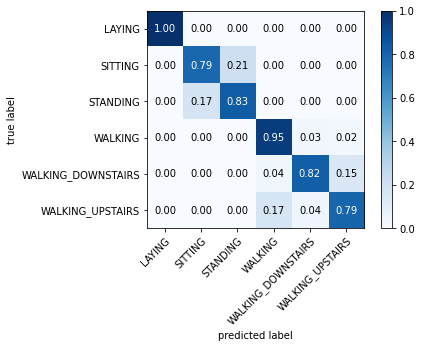

In [70]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=labels)
plt.show()

### Random Forest

In [49]:
#GridSearch
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=parameters,scoring = 'accuracy', cv=3)
rfc_grid.fit(x_train,y_train)

print("tuned hyperparameters :(best parameters) ",rfc_grid.best_params_)
print("accuracy :",rfc_grid.best_score_)
print('best estimator: ',rfc_grid.best_estimator_)

tuned hyperparameters :(best parameters)  {'max_depth': 7}
accuracy : 0.9111807203501557
best estimator:  RandomForestClassifier(max_depth=7)


In [71]:
#RANDOM FOREST
model = RandomForestClassifier(max_depth=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rfc_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print( 'Accuracy of Random Forest: ',rfc_accuracy)

Accuracy of Random Forest:  0.9155072955548015


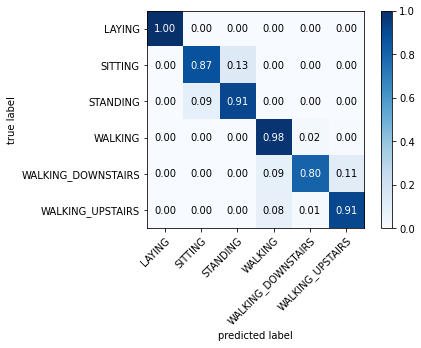

In [72]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=labels)
plt.show()

# Comparing All Models

In [105]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(lr_accuracy * 100,\
                                                  100-(lr_accuracy * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lsvc_accuracy * 100,\
                                                        100-(lsvc_accuracy * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(ksvm_accuracy * 100,\
                                                          100-(ksvm_accuracy * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_accuracy * 100,\
                                                        100-(dt_accuracy * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_accuracy * 100,\
                                                           100-(rfc_accuracy * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.83%       4.174%
Linear SVC          : 96.71%       3.291% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.56%      13.44% 
Random Forest       : 91.55%      8.449% 
